In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/immigration-to-canada-ibm-dataset/Canada.xlsx


In [8]:
!pip install openpyxl

     |████████████████████████████████| 243 kB 420 kB/s eta 0:00:01


In [16]:
df = pd.read_excel('/kaggle/input/immigration-to-canada-ibm-dataset/Canada.xlsx',
                  sheet_name = 'Canada by Citizenship',
                  skiprows=range(20),
                  skipfooter=2
                  )  

In [19]:
df = df.set_index("OdName")

In [24]:
df = df.iloc[:, :42]

In [28]:
df["Total"] = df.sum(axis = 1)

In [29]:
df

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,99903
Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,0,...,0,1,0,0,0,0,0,0,0,2719
Yemen,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,1,2,...,161,140,122,133,128,211,160,174,217,5744


In [38]:
df_years = df.iloc[:, 8:]

In [39]:
df_years

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,2749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,99903
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2719
Yemen,1,2,1,6,0,18,7,12,7,18,...,161,140,122,133,128,211,160,174,217,5744


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
df_top10 = df_years.sort_values("Total", ascending=False).iloc[0:10]

In [48]:
df_top10

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,243833
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,183261
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,155696
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,145324


In [84]:
years = list(map(str, df_top10.columns[:-1]))

<AxesSubplot:title={'center':'Countries with the most immigrants in Canada since 1980'}, xlabel='Year', ylabel='No. of Immigrants'>

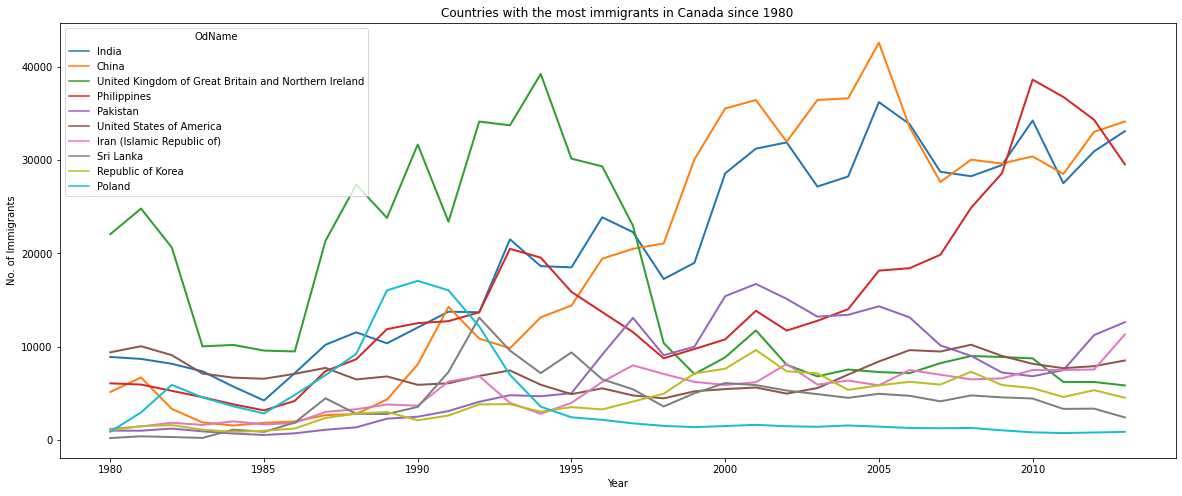

In [89]:
plt.figure(figsize=(20,8))
plt.title("Countries with the most immigrants in Canada since 1980")
plt.xlabel("Year")
plt.ylabel("No. of Immigrants")
sns.lineplot(data = df_top10.drop("Total", axis=1).transpose(), lw=2, palette='tab10', dashes=False)



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':"Immigrant's origin countries development status"}, xlabel='DevName', ylabel='count'>

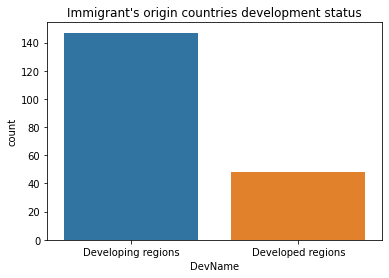

In [111]:
plt.title("Immigrant's origin countries development status")
sns.countplot(df.DevName)

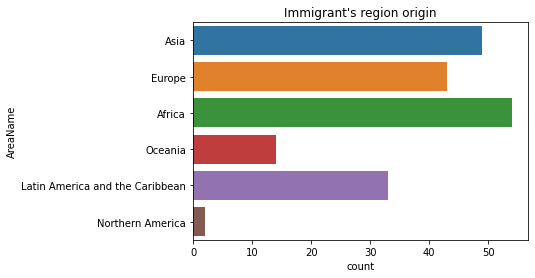

In [113]:
plt.title("Immigrant's region origin")
ax = sns.countplot(y=df.AreaName)

In [ ]:
import folium
